Plots: K2 FOV with mdeian light curves--This code just combines the images onton an FOV (images are created using ```hdf5_*_channel_summary_1med.py```)

In [1]:
from analysis import *

import h5py
import os
import richardsplot

campaign = 8

channel = 17
mod,submod = get_submod(channel)
submod-=1 # submods are 0-3 in the hdf5 file

hdf5_file = "/home/jackeline/Research/k2_pipeline/k2_LongTermSystematics/data/pixelmaps/k2pixelmap.hdf5"
# there are 23117 objects in the campaign 8 hdf5 file
# there are 3853 cadence points in c8
cadences = 3853
time = np.arange(cadences)/48.0

# need the kepler magnitudes
all_targets = pd.read_csv("/home/jackeline/Research/k2_pipeline/K2_official_targets/K2Campaign%stargets.csv"%campaign)

---

Text(0.5, 1.0, 'K2 Campaign 8')

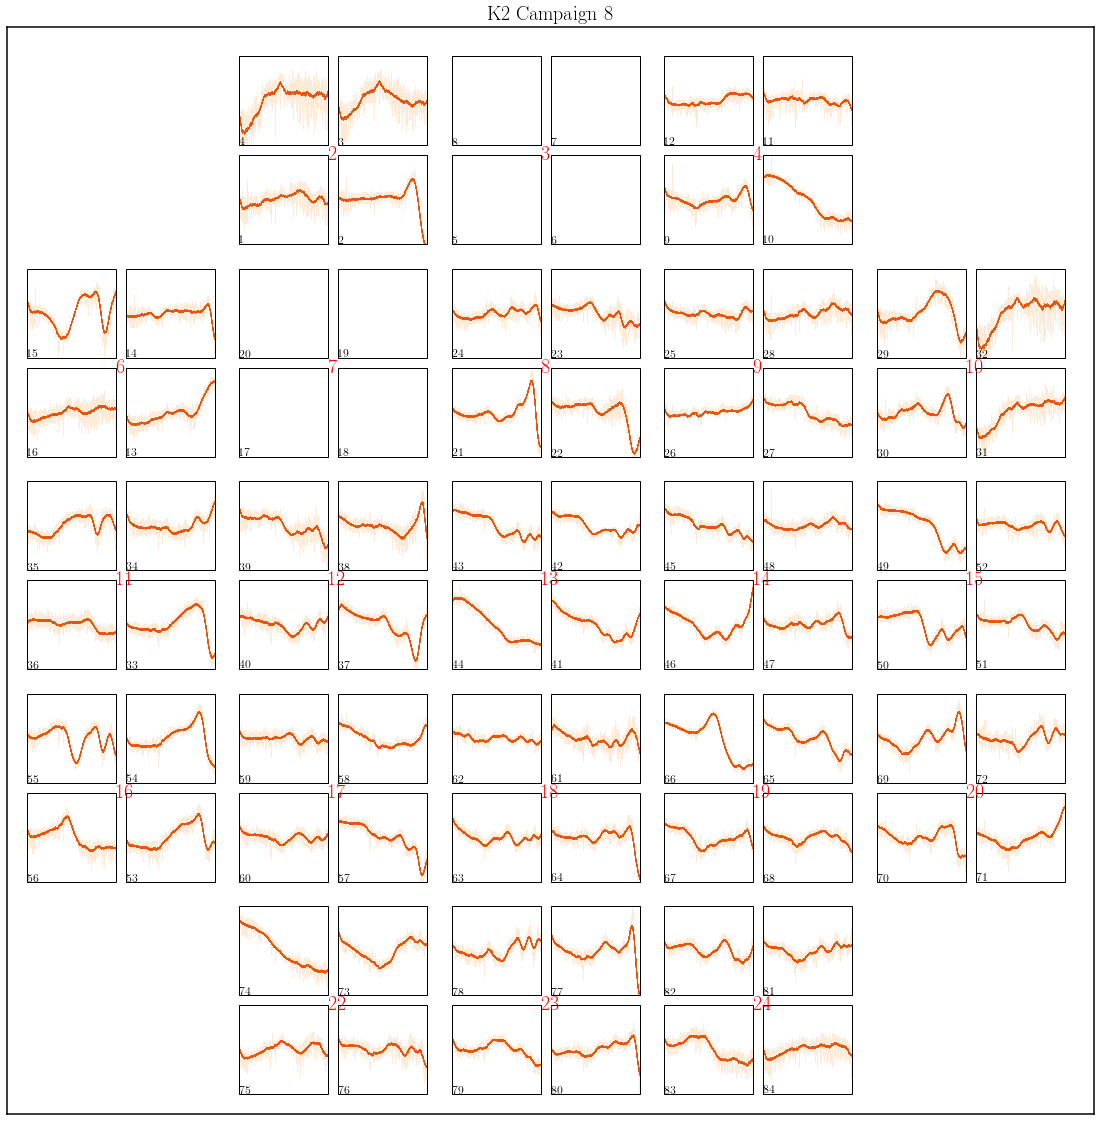

In [14]:
import matplotlib.patches as mpatches
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

mod = {"2":[-1, 2, "ld"], "3":[0, 2, "ld"], "4":[1,2, "ld"],
      "6":[-2,1, "rd"], "7":[-1,1, "ld"], "8":[0,1, "ld"], "9":[1,1, "lu"], "10":[2,1, "lu"],
      "11":[-2,0, "rd"], "12":[-1,0, "rd"], "13":[0,0, "rd"], "14":[1,0, "lu"], "15":[2,0, "lu"],
      "16":[-2,-1, "rd"], "17":[-1,-1, "rd"], "18":[0,-1, "ru"], "19":[1,-1, "ru"], "20":[2,-1, "lu"],
      "22":[-1, -2, "ru"], "23":[0, -2, "ru"], "24":[1,-2, "ru"]}

sub = {"1":[-1,-1], "2":[0,-1], "3":[0,0], "4":[-1,0]}

# the numbering doesn't always start in the same corner (goddammit!)
ordering = {"ld":[1,2,3,4], "rd":[2,3,4,1], "lu":[4,1,2,3], "ru":[3,4,1,2]}

square_side = 0.9# length of CCD on plot
spacing = 2.15# spacing between start of CCDs
fig,ax  = plt.subplots(1,1, figsize=(20,20))

for module in mod.keys():
    order = np.array(ordering[mod[module][2]]).astype(str)
    xz = mod[module][0]*spacing
    yz = mod[module][1]*spacing
    ax.text(xz-.1,yz-.15, str(module), fontsize = 20, color = "Red")

    for i in order:
        x = sub[i][0]+mod[module][0]*spacing
        y = sub[i][1]+mod[module][1]*spacing
        rectangle = mpatches.Rectangle(
            xy=(x, y),
            width=square_side, height=square_side,
            fill=None)
        ax.add_patch(rectangle)
        
        submodule = np.where(order==i)[0][0] # get the number for reference
        ch = get_channel(int(module), submodule)
        plt.text(sub[i][0]+mod[module][0]*2.15, sub[i][1]+mod[module][1]*2.15, ch, fontsize=12)
        
        
        try:
            img = plt.imread("/home/jackeline/Research/k2_pipeline/submit_med/c8_channels/Channel%s.png"%ch)
            x = sub[i][0]+mod[module][0]*spacing
            y = sub[i][1]+mod[module][1]*spacing
            ax.imshow(img, extent=[x, x+0.9, y, y+0.9])
            
        except:
            pass
        




#plt.imshow("submit/c8_channels/Channel1.png")   
ax.set_xlim([-5.5, 5.5])
ax.set_ylim([-5.5, 5.5])
ax.set_xticks([]) 
ax.set_yticks([]) 
plt.title("K2 Campaign 8", fontsize=20)
#plt.savefig("submit/C8_FOV_1med.pdf")

Text(0.5, 1.0, 'K2 Campaign 16')

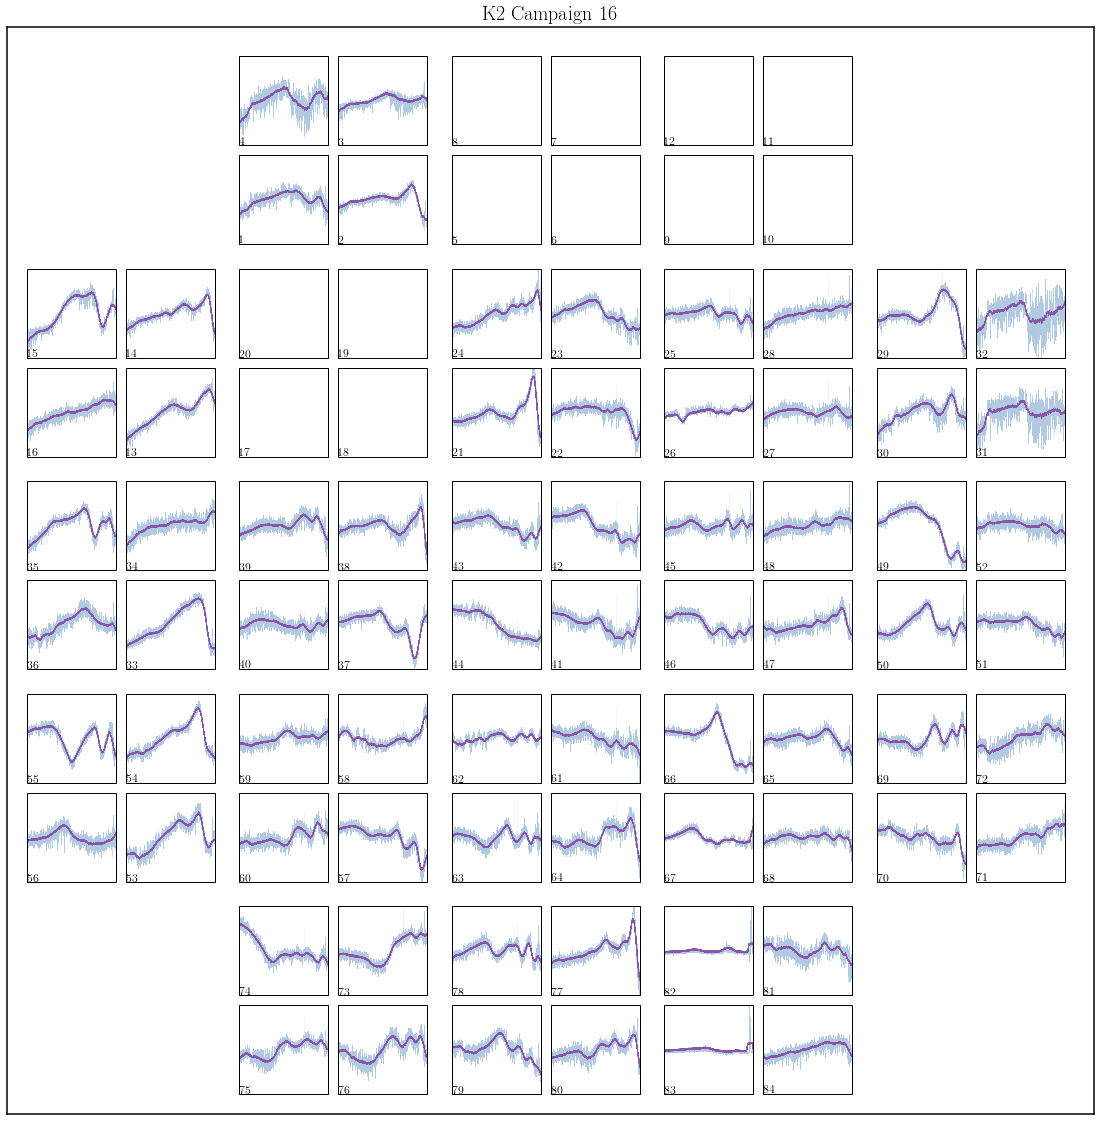

In [15]:
import matplotlib.patches as mpatches
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

mod = {"2":[-1, 2, "ld"], "3":[0, 2, "ld"], "4":[1,2, "ld"],
      "6":[-2,1, "rd"], "7":[-1,1, "ld"], "8":[0,1, "ld"], "9":[1,1, "lu"], "10":[2,1, "lu"],
      "11":[-2,0, "rd"], "12":[-1,0, "rd"], "13":[0,0, "rd"], "14":[1,0, "lu"], "15":[2,0, "lu"],
      "16":[-2,-1, "rd"], "17":[-1,-1, "rd"], "18":[0,-1, "ru"], "19":[1,-1, "ru"], "20":[2,-1, "lu"],
      "22":[-1, -2, "ru"], "23":[0, -2, "ru"], "24":[1,-2, "ru"]}

sub = {"1":[-1,-1], "2":[0,-1], "3":[0,0], "4":[-1,0]}

# the numbering doesn't always start in the same corner (goddammit!)
ordering = {"ld":[1,2,3,4], "rd":[2,3,4,1], "lu":[4,1,2,3], "ru":[3,4,1,2]}

square_side = 0.9# length of CCD on plot
spacing = 2.15# spacing between start of CCDs
fig,ax  = plt.subplots(1,1, figsize=(20,20))

for module in mod.keys():
    order = np.array(ordering[mod[module][2]]).astype(str)
    for i in order:
        x = sub[i][0]+mod[module][0]*spacing
        y = sub[i][1]+mod[module][1]*spacing
        rectangle = mpatches.Rectangle(
            xy=(x, y),
            width=square_side, height=square_side,
            fill=None)
        ax.add_patch(rectangle)
        
        submodule = np.where(order==i)[0][0] # get the number for reference
        ch = get_channel(int(module), submodule)
        plt.text(sub[i][0]+mod[module][0]*2.15, sub[i][1]+mod[module][1]*2.15, ch, fontsize=12)
        
        
        try:
            img = plt.imread("/home/jackeline/Research/k2_pipeline/submit_med/c16_channels/Channel%s.png"%ch)
            x = sub[i][0]+mod[module][0]*spacing
            y = sub[i][1]+mod[module][1]*spacing
            ax.imshow(img, extent=[x, x+0.9, y, y+0.9])
            
        except:
            pass
        


ax.set_xlim([-5.5, 5.5])
ax.set_ylim([-5.5, 5.5])
ax.set_xticks([]) 
ax.set_yticks([]) 
plt.title("K2 Campaign 16", fontsize=20)
#plt.savefig("/home/jackeline/Research/k2_pipeline/submit_med/C16_FOV_1med.pdf")

---
Overplot C8 and C16 

In [16]:
# define rolling band channels
bad_rolling_ch = [1, 2, 10, 11, 14, 25,26,27,28, 36, 44, 58, 62, 74, 79]# from campaign 0

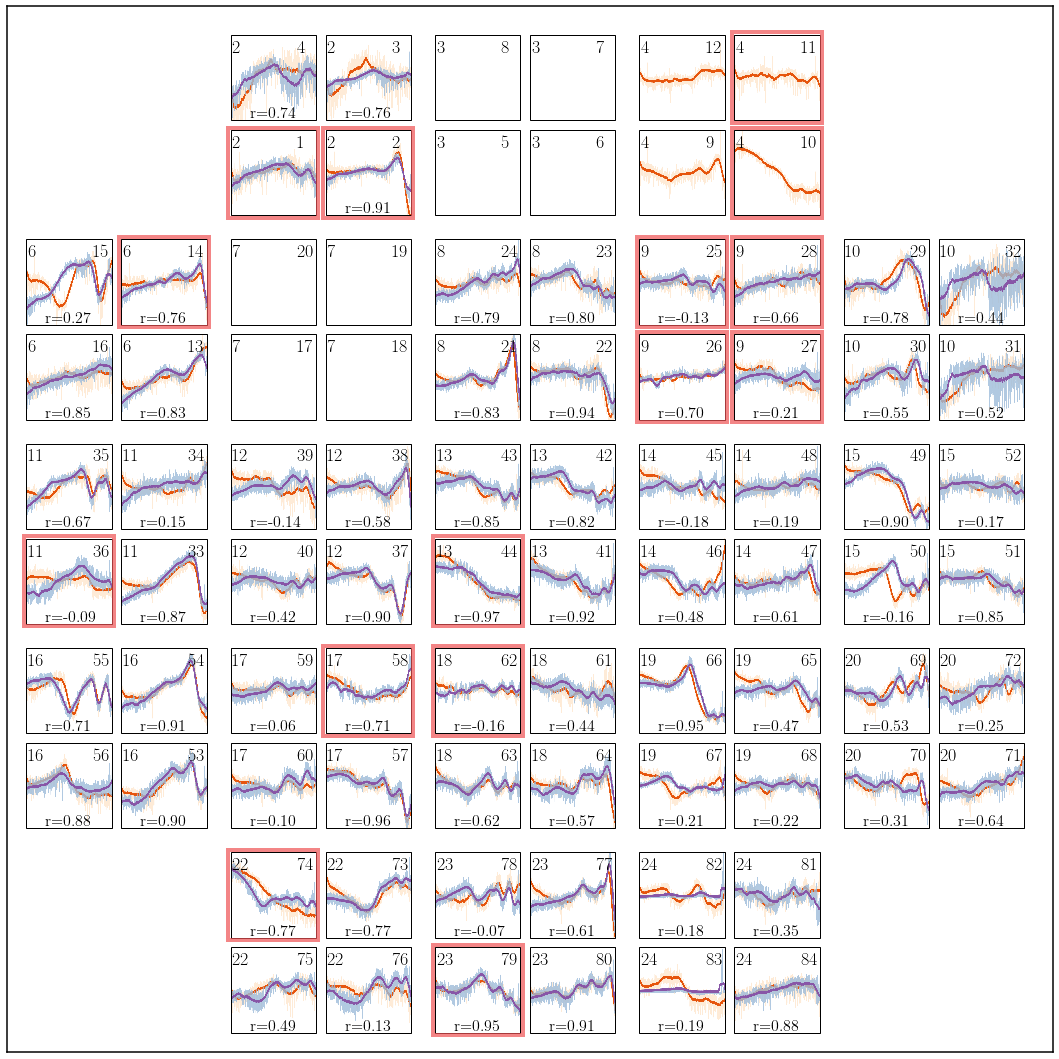

In [55]:
import matplotlib.patches as mpatches
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

mod = {"2":[-1, 2, "ld"], "3":[0, 2, "ld"], "4":[1,2, "ld"],
      "6":[-2,1, "rd"], "7":[-1,1, "ld"], "8":[0,1, "ld"], "9":[1,1, "lu"], "10":[2,1, "lu"],
      "11":[-2,0, "rd"], "12":[-1,0, "rd"], "13":[0,0, "rd"], "14":[1,0, "lu"], "15":[2,0, "lu"],
      "16":[-2,-1, "rd"], "17":[-1,-1, "rd"], "18":[0,-1, "ru"], "19":[1,-1, "ru"], "20":[2,-1, "lu"],
      "22":[-1, -2, "ru"], "23":[0, -2, "ru"], "24":[1,-2, "ru"]}

sub = {"1":[-1,-1], "2":[0,-1], "3":[0,0], "4":[-1,0]}

# the numbering doesn't always start in the same corner (goddammit!)
ordering = {"ld":[1,2,3,4], "rd":[2,3,4,1], "lu":[4,1,2,3], "ru":[3,4,1,2]}

square_side = 0.9# length of CCD on plot
spacing = 2.15# spacing between start of CCDs
fig,ax  = plt.subplots(1,1, figsize=(15,15))

for module in mod.keys():
    order = np.array(ordering[mod[module][2]]).astype(str)
    for i in order:
        x = sub[i][0]+mod[module][0]*spacing
        y = sub[i][1]+mod[module][1]*spacing
        rectangle = mpatches.Rectangle(
            xy=(x, y),
            width=square_side, height=square_side,
            fill=None)
        ax.add_patch(rectangle)
        
        submodule = np.where(order==i)[0][0] # get the number for reference
        ch = get_channel(int(module), submodule)
        plt.text(sub[i][0]+mod[module][0]*2.15+.7, sub[i][1]+mod[module][1]*2.15+0.72, ch, fontsize=18)
        plt.text(sub[i][0]+mod[module][0]*2.15+.02, sub[i][1]+mod[module][1]*2.15+.72, str(module), fontsize=18)
        #sub[i][0]+mod[module][0]*2.15+.3, sub[i][1]+mod[module][1]*2.15+0.72
        try:
            plt.text(sub[i][0]+mod[module][0]*2.15+.2, sub[i][1]+mod[module][1]*2.15+0.02, 'r={0:.2f}'.format(rcoeff[str(ch)].values[0])
, fontsize=16)
        except:
            pass
        

        if ch in bad_rolling_ch:
            diff = 0.05
            rectangle_bad = mpatches.Rectangle(
                xy=(x-diff/2, y-diff/2),
                width=square_side+diff, height=square_side+diff,
                fill=None, edgecolor="#ee5253", linewidth=4, alpha=0.7)
            ax.add_patch(rectangle_bad)
        
        try:
            img = plt.imread("/home/jackeline/Research/k2_pipeline/submit_med/c8_channels/Channel%s.png"%ch)
            x = sub[i][0]+mod[module][0]*spacing
            y = sub[i][1]+mod[module][1]*spacing
            ax.imshow(img, extent=[x, x+0.9, y, y+0.9])
            
            img = plt.imread("/home/jackeline/Research/k2_pipeline/submit_med/c16_channels/Channel%s.png"%ch)
            x = sub[i][0]+mod[module][0]*spacing
            y = sub[i][1]+mod[module][1]*spacing
            ax.imshow(img, extent=[x, x+0.9, y, y+0.9])
             
           
        except:
            pass
        
    #xz = mod[module][0]*spacing
    #yz = mod[module][1]*spacing
    #ax.text(xz-.1,yz-.15, str(module), fontsize = 20, color = "k") 



#plt.imshow("submit/c8_channels/Channel1.png")   
ax.set_xlim([-5.5, 5.5])
ax.set_ylim([-5.5, 5.5])
ax.set_xticks([]) 
ax.set_yticks([]) 
#plt.title("K2 Campaign 8 (red) and 16 (purple)", fontsize=20)
plt.tight_layout()
plt.savefig("./fig4.pdf")

In [30]:
import pandas as pd

In [31]:
rcoeff = pd.read_csv("CorrelationCoeff_16_8.csv")

In [42]:
'{0:.2f}'.format(rcoeff["55"].values[0])


'0.71'